# Question 5

In [1]:
import pandas as pd
import numpy as np
import os
import os as path
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import DataExtractor
sns.set()


In [3]:
plt.rcParams['figure.figsize'] = [11, 11]

In [2]:
def goal_by_distance(df_season : pd.DataFrame, data_extractor, year : int):
    # Création du dataframe pour la saison
    
    #Ajout des informations supplémentaires pour les calculs
    df_season_copy = df_season.copy()
    df_season_copy = df_season_copy.apply(data_extractor.distance_helpers, axis=1)
    df_season_copy['distances'] = df_season_copy.apply(data_extractor.compute_distances, axis=1)
    df_season_copy.rename(columns={ 'result.eventTypeId':'type_of_shot_id'}, inplace=True)
    df_season_copy['count'] = df_season_copy.apply(data_extractor.count, axis=1)
    
    # suppression des tirs de plus de la moitié du terrain 
    df_season_copy = df_season_copy[df_season_copy['distances']<= 100]
    
    #Création des dataFrame pour le plot
    bins = [i for i in range(0,110,10)]
    df_season_copy['range'] = pd.cut(df_season_copy['distances'],bins).astype(str)
    df_season_shot_type = df_season_copy.groupby(['range', 'type_of_shot_id'])['count'].count().reset_index()
    df_season_shot_type = df_season_shot_type.drop(labels=20, axis=0)
    season_df_shot = df_season_shot_type.query('type_of_shot_id == "SHOT"').reset_index(drop=True)
    season_df_goals = df_season_shot_type.query('type_of_shot_id == "GOAL"').reset_index(drop=True)
    
    plt.bar(season_df_shot['range'], season_df_shot['count'], label="tire", color='b')
    plt.bar(season_df_goals['range'], season_df_goals['count'], label="but", color='g')
    plt.plot()

    plt.xlabel("distance au filet")
    plt.xticks(fontsize=14, rotation=90)
    plt.ylabel("nombre de tirs")
    plt.title(f"Le nombre de tirs et le nombre de but en fonction de la distance en {year}")
    plt.legend()
    plt.show()

In [5]:
data_extractor = DataExtractor.DataExtractor()
df_season_2017 = data_extractor.get_season_into_dataframe('../hockey/Season20172018/season20172018.json')

#df_season_2018 = data_extractor.get_season_into_dataframe('../hockey/Season20182019/season20182019.json')
#df_season_2019 = data_extractor.get_season_into_dataframe('../hockey/Season20192020/season20192020.json')
#df_season_2020 = data_extractor.get_season_into_dataframe('../hockey/Season20202021/season20202021.json')
#df_season_2021 = data_extractor.get_season_into_dataframe('../hockey/Season20212022/season20212022.json')

2017020001
2017020002
2017020003
2017020004
2017020005
2017020006
2017020007
2017020008
2017020009
2017020010
2017020011
2017020012
2017020013
2017020014
2017020015
2017020016
2017020017
2017020018
2017020019
2017020020
2017020021
2017020022
2017020023
2017020024
2017020025
2017020026
2017020027
2017020028
2017020029
2017020030
2017020031
2017020032
2017020033
2017020034
2017020035
2017020036
2017020037
2017020038
2017020039
2017020040
2017020041
2017020042
2017020043
2017020044
2017020045
2017020046
2017020047
2017020048
2017020049
2017020050
2017020051
2017020052
2017020053
2017020054
2017020055
2017020056
2017020057
2017020058
2017020059
2017020060
2017020061
2017020062
2017020063
2017020064
2017020065
2017020066
2017020067
2017020068
2017020069
2017020070
2017020071
2017020072
2017020073
2017020074
2017020075
2017020076
2017020077
2017020078
2017020079
2017020080
2017020081
2017020082
2017020083
2017020084
2017020085
2017020086
2017020087
2017020088
2017020089
2017020090
2017020091

2017020746
2017020747
2017020748
2017020749
2017020750
2017020751
2017020752
2017020753
2017020754
2017020755
2017020756
2017020757
2017020758
2017020759
2017020760
2017020761
2017020762
2017020763
2017020764
2017020765
2017020766
2017020767
2017020768
2017020769
2017020770
2017020771
2017020772
2017020773
2017020774
2017020775
2017020776
2017020777
2017020778
2017020779
2017020780
2017020781
2017020782
2017020783
2017020784
2017020785
2017020786
2017020787
2017020788
2017020789
2017020790
2017020791
2017020792
2017020793
2017020794
2017020795
2017020796
2017020797
2017020798
2017020799
2017020800
2017020801
2017020802
2017020803
2017020804
2017020805
2017020806
2017020807
2017020808
2017020809
2017020810
2017020811
2017020812
2017020813
2017020814
2017020815
2017020816
2017020817
2017020818
2017020819
2017020820
2017020821
2017020822
2017020823
2017020824
2017020825
2017020826
2017020827
2017020828
2017020829
2017020830
2017020831
2017020832
2017020833
2017020834
2017020835
2017020836

In [6]:
df_season_2017.head()

,about.periodTime,about.eventId,about.eventIdx,team.name,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet,ID
0,00:38,54,5,Winnipeg Jets,SHOT,-36.0,-28.0,Josh Morrissey,Frederik Andersen,Wrist Shot,None,None,2017020001
1,00:49,55,7,Winnipeg Jets,SHOT,-75.0,1.0,Shawn Matthias,Frederik Andersen,Wrist Shot,None,None,2017020001
2,01:03,58,11,Winnipeg Jets,SHOT,-73.0,10.0,Bryan Little,Frederik Andersen,Backhand,None,None,2017020001
3,01:46,62,16,Toronto Maple Leafs,SHOT,80.0,-3.0,Eric Fehr,Steve Mason,Wrist Shot,None,None,2017020001
4,03:42,68,24,Winnipeg Jets,SHOT,-44.0,-21.0,Patrik Laine,Frederik Andersen,Snap Shot,None,None,2017020001


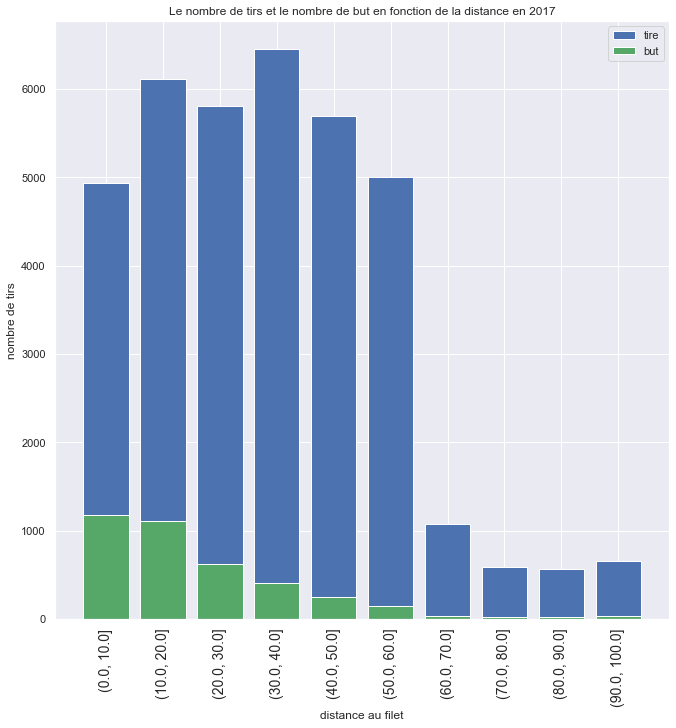

In [7]:
goal_by_distance(df_season_2017, data_extractor, 2017)

In [8]:
data_extractor = DataExtractor()
df_season_2018 = data_extractor.get_season_into_dataframe('../hockey/Season20182019/season20182019.json')

2018020001
2018020002
2018020003
2018020004
2018020005
2018020006
2018020007
2018020008
2018020009
2018020010
2018020011
2018020012
2018020013
2018020014
2018020015
2018020016
2018020017
2018020018
2018020019
2018020020
2018020021
2018020022
2018020023
2018020024
2018020025
2018020026
2018020027
2018020028
2018020029
2018020030
2018020031
2018020032
2018020033
2018020034
2018020035
2018020036
2018020037
2018020038
2018020039
2018020040
2018020041
2018020042
2018020043
2018020044
2018020045
2018020046
2018020047
2018020048
2018020049
2018020050
2018020051
2018020052
2018020053
2018020054
2018020055
2018020056
2018020057
2018020058
2018020059
2018020060
2018020061
2018020062
2018020063
2018020064
2018020065
2018020066
2018020067
2018020068
2018020069
2018020070
2018020071
2018020072
2018020073
2018020074
2018020075
2018020076
2018020077
2018020078
2018020079
2018020080
2018020081
2018020082
2018020083
2018020084
2018020085
2018020086
2018020087
2018020088
2018020089
2018020090
2018020091

2018020746
2018020747
2018020748
2018020749
2018020750
2018020751
2018020752
2018020753
2018020754
2018020755
2018020756
2018020757
2018020758
2018020759
2018020760
2018020761
2018020762
2018020763
2018020764
2018020765
2018020766
2018020767
2018020768
2018020769
2018020770
2018020771
2018020772
2018020773
2018020774
2018020775
2018020776
2018020777
2018020778
2018020779
2018020780
2018020781
2018020782
2018020783
2018020784
2018020785
2018020786
2018020787
2018020788
2018020789
2018020790
2018020791
2018020792
2018020793
2018020794
2018020795
2018020796
2018020797
2018020798
2018020799
2018020800
2018020801
2018020802
2018020803
2018020804
2018020805
2018020806
2018020807
2018020808
2018020809
2018020810
2018020811
2018020812
2018020813
2018020814
2018020815
2018020816
2018020817
2018020818
2018020819
2018020820
2018020821
2018020822
2018020823
2018020824
2018020825
2018020826
2018020827
2018020828
2018020829
2018020830
2018020831
2018020832
2018020833
2018020834
2018020835
2018020836

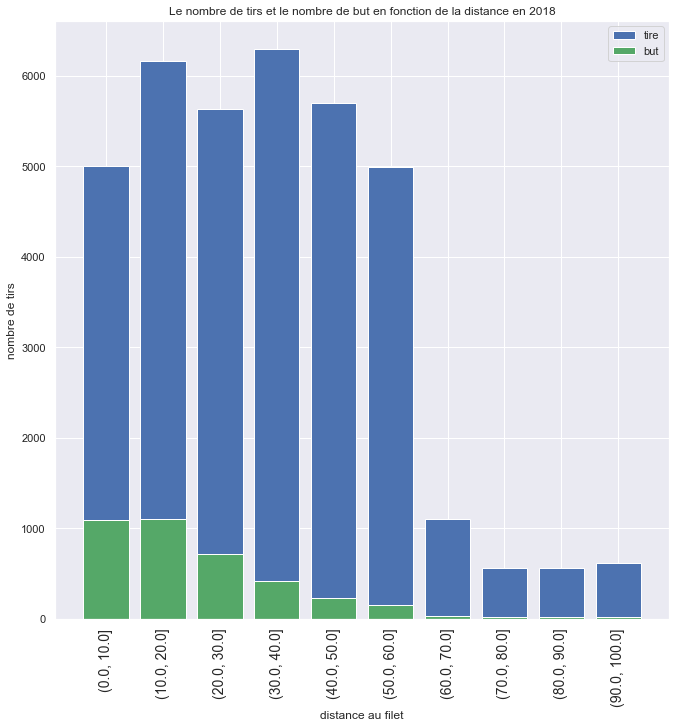

In [19]:
goal_by_distance(df_season_2018, data_extractor, 2018)